In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
#ここを変える
folder = "dropout/"
text_name = "CH_data_dropout0.4_predict_test.txt"


# dataname = "CH_data"
# alldata = "test"
# modelname = ""
# no_train_data = 0

In [3]:
# if modelname == "":
#     data = np.loadtxt(f'result/{dataname}_predict_{alldata}.txt')
# else:
#     data = np.loadtxt(f'result/{dataname}_{modelname}_predict_{alldata}.txt')

data = np.loadtxt(f'result/{folder}{text_name}')
x = data[:, 0]
y = data[:, 1]

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

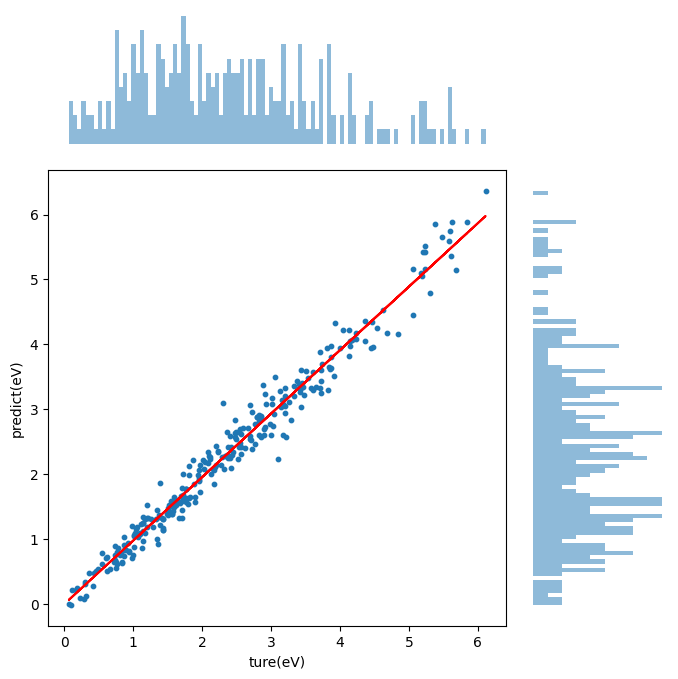

In [4]:
fig = plt.figure(figsize=(8, 8))

gs = fig.add_gridspec(4, 4)

ax = fig.add_subplot(gs[1:4, :3])
axx = fig.add_subplot(gs[0, :3], sharex=ax)
axy = fig.add_subplot(gs[1:4, 3], sharey=ax)

ax.scatter(x, y, s=10)
ax.plot(x, intercept + slope*x, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))

axx.hist(x, bins=100, alpha=0.5)
axy.hist(y, bins=100, orientation='horizontal', alpha=0.5)

axx.axis('off')
axy.axis('off')
# ax.set_title(f"{dataname}_{alldata}_{modelname}")
ax.set_xlabel("ture(eV)")
ax.set_ylabel("predict(eV)")
plt.savefig(f"resultplot/all_data/{text_name}.png")
# if modelname == "":
#     plt.savefig(f"resultplot/{dataname}_{alldata}.png")
# else:
#     plt.savefig(f"resultplot/{dataname}_{alldata}_{modelname}.png")
plt.show()